#### Import all the packages

In [1]:
import numpy as np
import pandas as pd
import time
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#### Load the training data

In [2]:
url = 'https://query.data.world/s/ksxft7lhmbxpihskwsngwhpuul6lye'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']

spec_df = pd.read_csv(url, sep=',', names=col_names)
spec_df

print(spec_df.shape)

(80, 45)


#### Load the testing data

In [3]:
url = 'https://query.data.world/s/cuqtpuoewpxysusrt5z4igihjah4xo'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']

spec_test_df = pd.read_csv(url, sep=',', names=col_names)
spec_test_df.shape

(187, 45)

#### EDA

In [4]:
spec_df.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


In [5]:
spec_test_df.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [6]:
spec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 45 columns):
target    80 non-null int64
F1R       80 non-null int64
F1S       80 non-null int64
F2R       80 non-null int64
F2S       80 non-null int64
F3R       80 non-null int64
F3S       80 non-null int64
F4R       80 non-null int64
F4S       80 non-null int64
F5R       80 non-null int64
F5S       80 non-null int64
F6R       80 non-null int64
F6S       80 non-null int64
F7R       80 non-null int64
F7S       80 non-null int64
F8R       80 non-null int64
F8S       80 non-null int64
F9R       80 non-null int64
F9S       80 non-null int64
F10R      80 non-null int64
F10S      80 non-null int64
F11R      80 non-null int64
F11S      80 non-null int64
F12R      80 non-null int64
F12S      80 non-null int64
F13R      80 non-null int64
F13S      80 non-null int64
F14R      80 non-null int64
F14S      80 non-null int64
F15R      80 non-null int64
F15S      80 non-null int64
F16R      80 non-null int64
F

In [7]:
spec_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
target    187 non-null int64
F1R       187 non-null int64
F1S       187 non-null int64
F2R       187 non-null int64
F2S       187 non-null int64
F3R       187 non-null int64
F3S       187 non-null int64
F4R       187 non-null int64
F4S       187 non-null int64
F5R       187 non-null int64
F5S       187 non-null int64
F6R       187 non-null int64
F6S       187 non-null int64
F7R       187 non-null int64
F7S       187 non-null int64
F8R       187 non-null int64
F8S       187 non-null int64
F9R       187 non-null int64
F9S       187 non-null int64
F10R      187 non-null int64
F10S      187 non-null int64
F11R      187 non-null int64
F11S      187 non-null int64
F12R      187 non-null int64
F12S      187 non-null int64
F13R      187 non-null int64
F13S      187 non-null int64
F14R      187 non-null int64
F14S      187 non-null int64
F15R      187 non-null int64
F15S      187 non-null in

*** There are no missing values and all columns are integers

In [8]:
spec_df.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,0.500000,68.650000,67.55000,69.550000,70.850000,67.100000,67.687500,72.075000,71.387500,64.362500,...,65.18750,64.662500,65.612500,65.01250,69.437500,68.412500,66.33750,65.100000,55.975000,55.075000
std,0.503155,5.594075,6.88403,5.901941,6.326757,6.251278,6.622925,4.090047,5.715831,7.425996,...,5.71273,7.538834,7.694308,9.44336,7.809186,8.582723,10.62591,11.345662,10.779698,12.119422
min,0.000000,57.000000,51.00000,52.000000,51.000000,47.000000,46.000000,63.000000,56.000000,26.000000,...,31.00000,13.000000,33.000000,23.00000,31.000000,30.000000,31.00000,30.000000,11.000000,11.000000
25%,0.000000,64.750000,64.00000,66.000000,67.000000,63.750000,63.750000,68.750000,69.000000,61.000000,...,63.00000,63.000000,62.750000,62.00000,65.000000,65.000000,64.00000,63.000000,53.000000,52.750000
50%,0.500000,69.000000,67.00000,70.000000,72.000000,68.000000,68.500000,72.500000,72.000000,65.000000,...,66.00000,65.500000,66.000000,66.50000,70.500000,71.000000,69.00000,68.000000,59.000000,58.000000
75%,1.000000,72.000000,73.00000,74.000000,75.250000,71.000000,71.250000,75.000000,75.000000,68.250000,...,68.00000,69.000000,71.000000,71.00000,74.000000,74.000000,73.25000,71.000000,63.000000,63.000000
max,1.000000,80.000000,81.00000,82.000000,84.000000,78.000000,89.000000,79.000000,83.000000,77.000000,...,73.00000,73.000000,77.000000,77.00000,83.000000,80.000000,79.00000,83.000000,71.000000,73.000000


In [9]:
spec_test_df.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


*** To check the normal & abnormal patients in the training and testing data plot them using seaborn

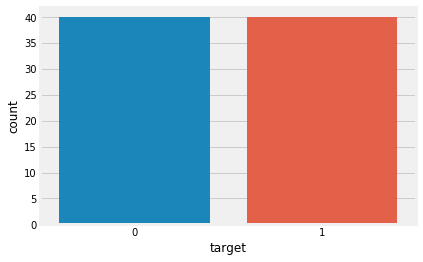

In [10]:
sns.countplot(x='target', data=spec_df)
# Equal count here

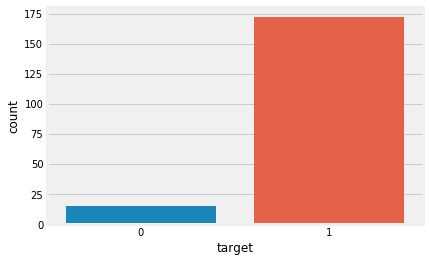

In [11]:
sns.countplot(x='target', data=spec_test_df)
# 0 meaning abnormal and 1 means normal. Most of them spect images are normal

*** Check correlation between all the X's(all features)

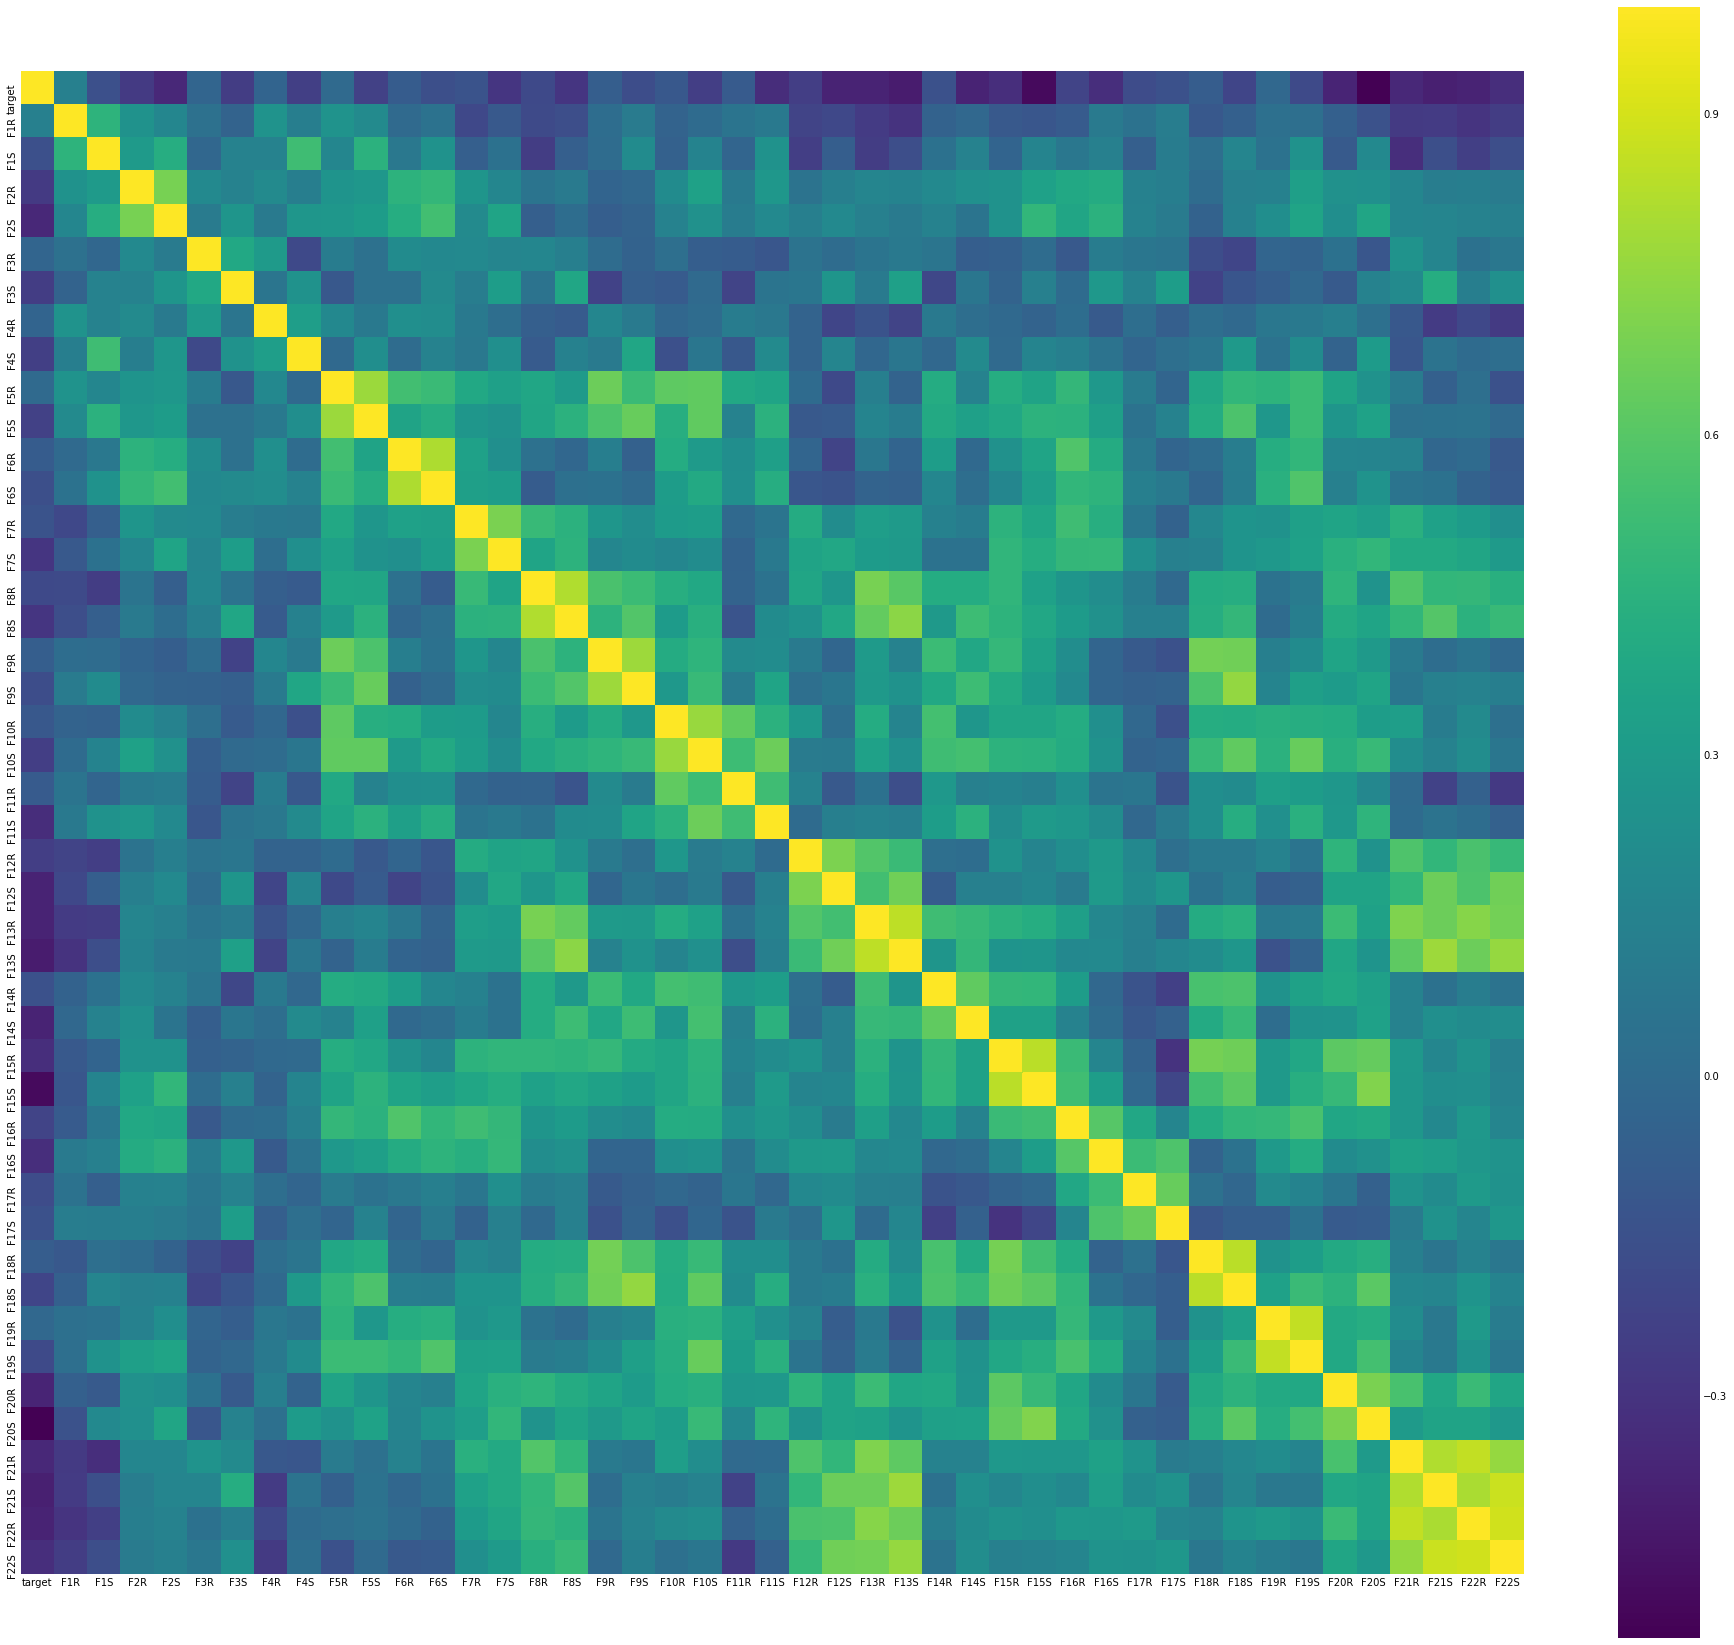

In [12]:
corr = spec_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, square=True, cmap='viridis')

*** Visually not good. Since there are too many columns and there is no corrleation between many columns.

*** Drawing the histogram to check distribution of the data

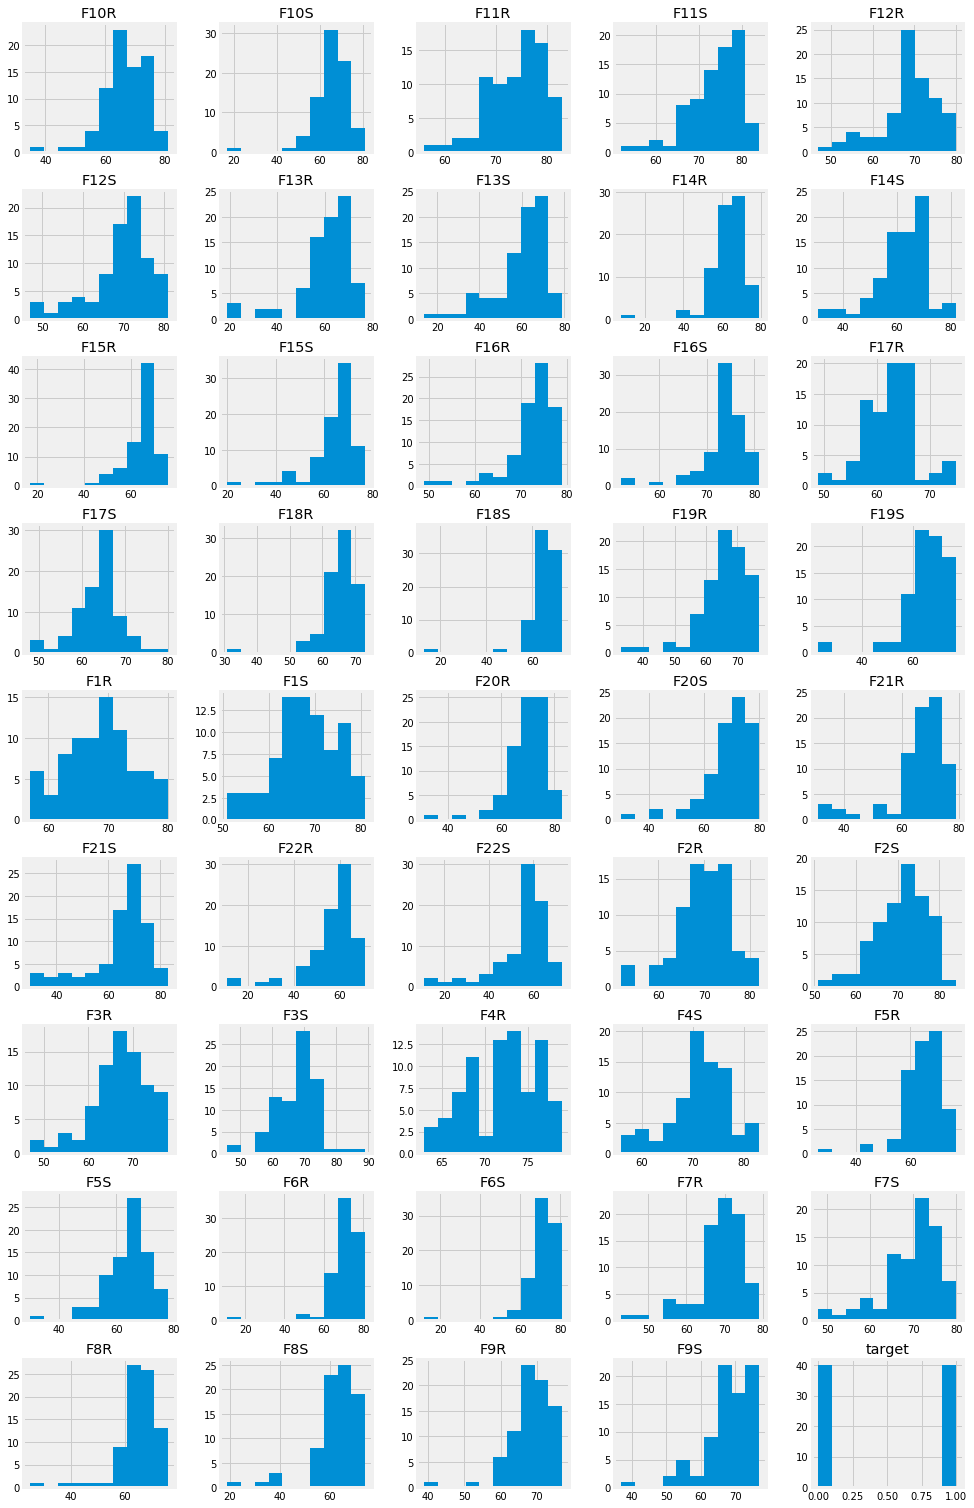

In [13]:
spec_df.hist(bins=10, figsize=(15,30), layout=(10,5))
plt.show()

*** Most of the distribution is normal distribution

#### Split the data into features and labels 

In [14]:
target = spec_df['target']
spec_df.drop('target', axis=1, inplace=True)
spec_df.shape

(80, 44)

In [15]:
target_test = spec_test_df['target']
spec_test_df.drop('target', axis=1, inplace=True)
spec_test_df.shape

(187, 44)

#### Normalizing the data using z-score

*** Scaling is important because all the columns are in different ranges(scales)

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
spec_df = scalar.fit_transform(spec_df)
spec_test_df = scalar.fit_transform(spec_test_df)

C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


*** After scaling 99% of the values lie between -3SD and +3SD.

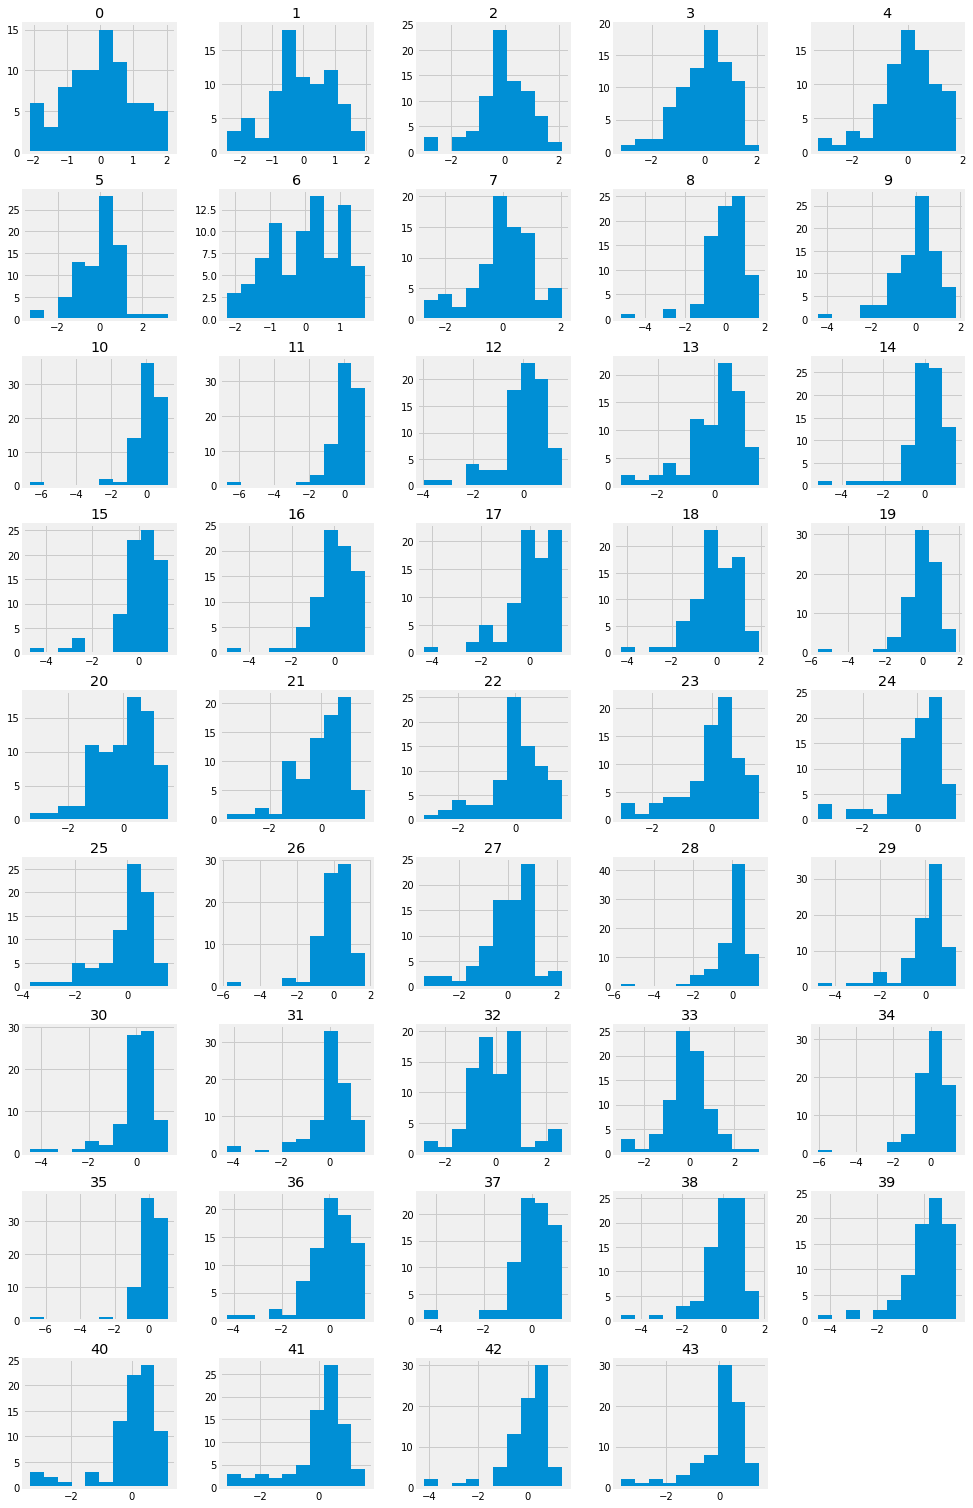

In [17]:
spec_df = pd.DataFrame(spec_df)
spec_df.hist(bins=10, figsize=(15,30), layout=(10,5))
plt.show()

####  Time taken to build a logistic model without PCA

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
start = time.time()
logreg.fit(spec_df, target)
end = time.time()
training_time = end-start
print('Logreg without PCA :', training_time)

Logreg without PCA : 0.008000612258911133


C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Make prediction using test data

In [19]:
y_pred_test = logreg.predict(spec_test_df)

#### Evaluate the model using metrics

In [21]:
from sklearn import metrics
print(metrics.accuracy_score(target_test, y_pred_test))
print(metrics.confusion_matrix(target_test, y_pred_test))
print(metrics.classification_report(target_test, y_pred_test))

0.5240641711229946
[[13  2]
 [87 85]]
              precision    recall  f1-score   support

           0       0.13      0.87      0.23        15
           1       0.98      0.49      0.66       172

   micro avg       0.52      0.52      0.52       187
   macro avg       0.55      0.68      0.44       187
weighted avg       0.91      0.52      0.62       187



#### Now we apply PCA and check model metrics and performance 

In [28]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(spec_df)
# We are dwaling with onlt features, hence label not required in fit
print(pca.n_components_)
np.round(pca.explained_variance_ratio_ * 100, 1)

44


array([27.3, 14.4,  9.9,  6.4,  4.8,  4.5,  4.2,  3.3,  2.9,  2.8,  2.4,
        2.2,  1.6,  1.5,  1.3,  1.2,  1. ,  0.9,  0.9,  0.8,  0.7,  0.6,
        0.5,  0.5,  0.4,  0.4,  0.4,  0.3,  0.3,  0.2,  0.2,  0.2,  0.2,
        0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ])

*** This explains how much of each features explain the whole of data

*** Randomly select first 15 components to explain the whole data instead if all 44 features

In [23]:
np.round(pca.explained_variance_ratio_[0:15] *100, 1)

array([27.3, 14.4,  9.9,  6.4,  4.8,  4.5,  4.2,  3.3,  2.9,  2.8,  2.4,
        2.2,  1.6,  1.5,  1.3])

In [26]:
pca.explained_variance_ratio_[0:15].sum() # Just 15 components are enough to explain almost 90% of the data. So we need not use
# all the components which explains the curse of dimensionality problem

0.893476015325651

#### Plot the relation b/w variance and components to choose the right no of PCA components required 

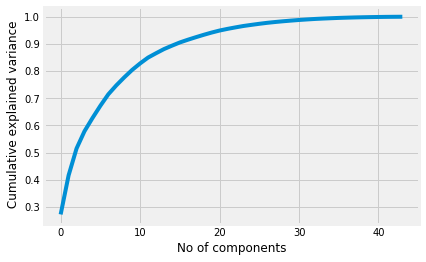

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel(' Cumulative explained variance')
plt.show()

*** We can go ahead with only 15 components as it explains 90% of our data

In [29]:
x_pca = PCA(n_components = 15)
spec_pca = x_pca.fit_transform(spec_df)
spec_test_pca = x_pca.fit_transform(spec_test_df)

*** Now compare the original df with pca modified df

In [30]:
print(spec_df.shape)
print(spec_pca.shape)

(80, 44)
(80, 15)


In [31]:
print(spec_test_df.shape)
print(spec_test_pca.shape)

(187, 44)
(187, 15)


In [33]:
transform_df = pd.DataFrame(spec_pca, columns=('P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15'))
transform_df.head()
print(transform_df.shape)

(80, 15)


*** Check the correlation after applying the PCA for df

Text(0.5, 1.0, 'Correlation after PCA')

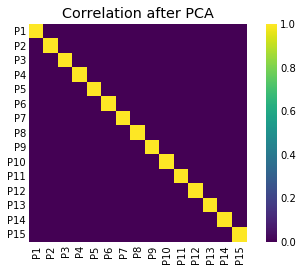

In [35]:
corr = transform_df.corr()
sns.heatmap(corr, square=True, cmap='viridis')
plt.title('Correlation after PCA')

*** All the 15 components do not have any correlation which is good in terms of explaing the model since all are independent and can explain differently.

*** Check the processing time now for logistic regression now after applying PCA

In [39]:
pca_logreg = LogisticRegression()
start = time.time()
pca_logreg.fit(spec_pca, target)
end = time.time()
processing_time = end-start
print('Time to evaluate model with PCA:',processing_time )

Time to evaluate model with PCA: 0.003999948501586914


C:\Users\karthikeya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
y_pred_pca = pca_logreg.predict(spec_test_pca)
print(metrics.accuracy_score(target_test,y_pred_pca))
print(metrics.confusion_matrix(target_test,y_pred_pca))
print(metrics.classification_report(target_test,y_pred_pca))

0.5508021390374331
[[13  2]
 [82 90]]
              precision    recall  f1-score   support

           0       0.14      0.87      0.24        15
           1       0.98      0.52      0.68       172

   micro avg       0.55      0.55      0.55       187
   macro avg       0.56      0.69      0.46       187
weighted avg       0.91      0.55      0.65       187



*** We can clearly see even with reduced components from 44 to 15 we have same accuracy, precision and recall values and model evaluation time has reduced form 0.0080 to 0.0039 secs.